# Classification and Regression Trees (CART)

Amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir. Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

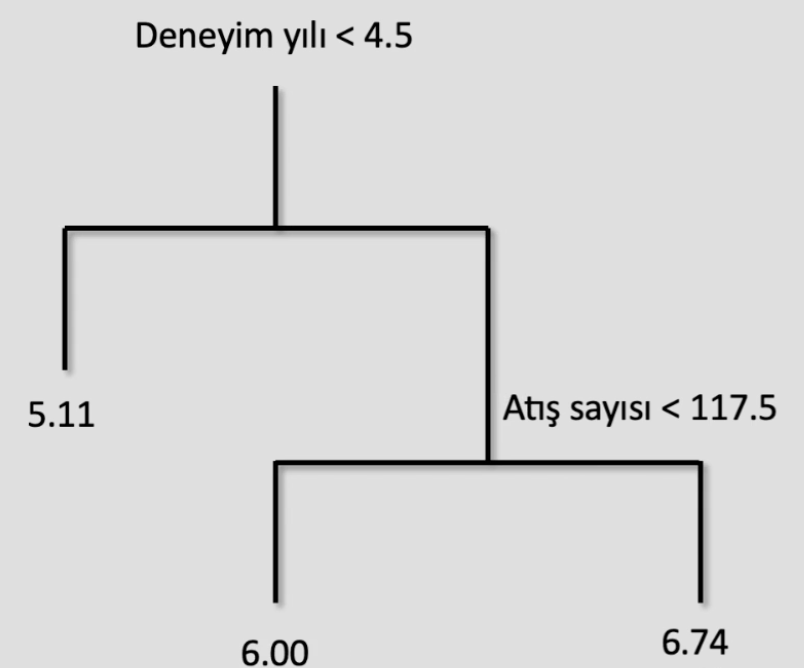

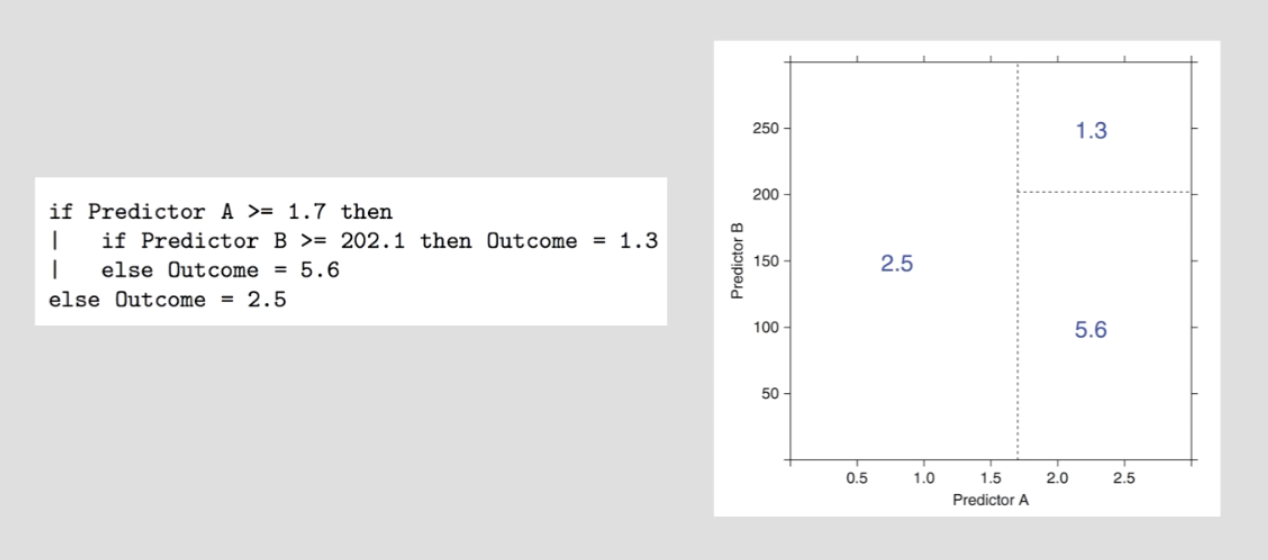

Regresyon ağaçlarında overfitting problemi karşımıza çıkabilir. çünkü çok fazla dallanmalar meydana gelebilir. bu çok fazla dallanma örnek veri setinin çok iyi temsil edilmesini ifade eder. train içerisinde çok başarılı bir şekilde tahmin edebilir. fakat bu test setine veya farklı bir veri setine uygulandığında başarılı olmaz ebzerleme problemi ortaya çıkar. bunun üzerine ağaçların budanması ortaya çıkmış yani karmaşıklık parametresi belirlenir bu karmaşıklık parametresi belirli bir noktada ağaçların dallanmasını durdurur. cv ile karmaşıklık parametresi bulabiliriz. dallanmaların nerede duracağına karar vermek için hata kareler toplamındaki düşüş belirli bir eşik değerin altındaysa bölünme dursun

# CART - Model

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [4]:
from sklearn.tree import DecisionTreeRegressor
# modeli oluşturduk
cart_model = DecisionTreeRegressor()

In [5]:
# modeli eğittim
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [6]:
# X_train'in en küçük değerinden 0.01 artırarak en büyük değerine kadar git
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
# uzunluğu kadar satır, 1 sütun
X_grid = X_grid.reshape((len(X_grid), 1))

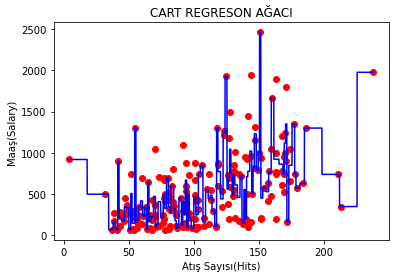

In [7]:
# görselleştirme
plt.scatter(X_train, y_train, color="red")
plt.plot(X_grid, cart_model.predict(X_grid), color="blue")
plt.title("CART REGRESON AĞACI")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)");

bir regresyon modelinin iki değişken bazında nasıl olduğumuz gözlemliyoruz. çok karışık görünüyor. eğer max_leaf_nodes = 3 yaparsak bakalım

In [8]:
from sklearn.tree import DecisionTreeRegressor
# modeli oluşturduk
cart_model = DecisionTreeRegressor(max_leaf_nodes = 3)

In [9]:
# modeli eğittim
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=3)

In [10]:
# X_train'in en küçük değerinden 0.01 artırarak en büyük değerine kadar git
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
# uzunluğu kadar satır, 1 sütun
X_grid = X_grid.reshape((len(X_grid), 1))

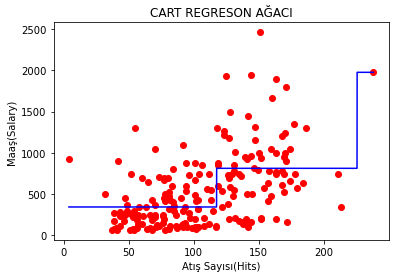

In [11]:
# görselleştirme
# Hits(X_train) ve Salary(y_train) için bir scatter plot oluşturduk
plt.scatter(X_train, y_train, color="red")
# tahmin edilen değerleri grafiğe ekliyoruz  
plt.plot(X_grid, cart_model.predict(X_grid), color="blue")
plt.title("CART REGRESON AĞACI")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)");

max_leaf_nodes = 3 yaptığımızda x eksenindeki bağımsız değişken değerine göre bu şekilde bölme işlemleri gerçekleşir.

In [12]:
from sklearn.tree import DecisionTreeRegressor
# modeli oluşturduk
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [13]:
# modeli eğittim
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [14]:
# X_train'in en küçük değerinden 0.01 artırarak en büyük değerine kadar git
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
# uzunluğu kadar satır, 1 sütun
X_grid = X_grid.reshape((len(X_grid), 1))

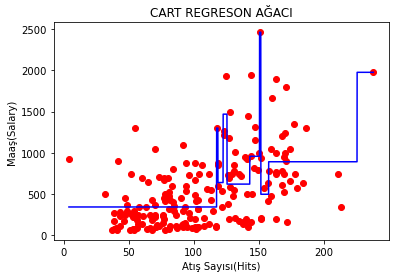

In [15]:
# görselleştirme
# Hits(X_train) ve Salary(y_train) için bir scatter plot oluşturduk
plt.scatter(X_train, y_train, color="red")
# tahmin edilen değerleri grafiğe ekliyoruz  
plt.plot(X_grid, cart_model.predict(X_grid), color="blue")
plt.title("CART REGRESON AĞACI")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)");

max_leaf_nodes = 10 yaptığımızda x eksenindeki bağımsız değişken değerine göre bu şekilde bölme işlemleri gerçekleşir.

#### Amacımız max_leaf_nodes parametresinin optimum değerini bulmak

## Kural Setini Üretelim

In [16]:
# !pip install SKompiler
# !pip install astor

In [17]:
from skompiler import skompile

In [18]:
# oluşturmuş olduğumuz bu modelin kural setini dışarıya çıkarmış olacağız
print(skompile(cart_model.predict).to("python/code"))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



# CART - Tahmin

In [19]:
x=[91]

In [20]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [21]:
# test veri seti için y tahmin değerleri
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [22]:
# 91 değerinin tahmini y değeri
cart_model.predict([[91]])

array([345.20115517])

In [23]:
# test veri seti için y tahmin değerleri
y_pred = cart_model.predict(X_test)

In [24]:
# test veri seti için rmse hatası
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

# CART - Model Tuning

In [25]:
cart_model = DecisionTreeRegressor()

In [26]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
y_pred = cart_model.predict(X_test)

In [28]:
np.sqrt(mean_squared_error(y_test,y_pred))

468.49579052913884

In [37]:
cart_params={
    "min_samples_split": range(2,100),
    "max_leaf_nodes": range(2,10)
}

Elbette, daha detaylı bir açıklama sunayım:

Karar ağaçları, veri madenciliği ve makine öğreniminde yaygın olarak kullanılan bir algoritmadır. Bir karar ağacı, veriyi basit karar kuralları ve sınıflandırma/regresyon işlemleri kullanarak işleyen bir ağaç yapısıdır. Her iç düğüm (node), bir özellik (feature) üzerinde bir karar noktasını temsil ederken, yaprak düğümleri (leaf node) sonuç sınıflarını veya tahmin değerlerini içerir.

Bu tür bir ağaç yapısı oluşturulurken, bazı parametreler belirlenir. Bu parametreler, modelin nasıl oluşturulacağını ve eğitileceğini kontrol etmek için kullanılır. İşte sizin verdiğiniz kod parçasındaki parametrelerin detaylı açıklamaları:

1. `min_sample_split`:
   - Bu parametre, bir iç düğümün iki alt düğüme bölünmesi için gereken minimum örnek sayısını belirtir.
   - Örneğin, eğer `min_sample_split=10` olarak ayarlanırsa, bir iç düğüm sadece 10 veya daha fazla örnek içeriyorsa alt düğümlere bölünebilir.
   - Bu parametrenin amacı, ağacın aşırı uyuma (overfitting) eğilimini sınırlamak ve daha genelleştirilebilir bir model elde etmektir.

2. `max_leaf_nodes`:
   - Bu parametre, oluşturulan ağaçta en fazla kaç yaprak düğümü olabileceğini belirtir.
   - Eğer `max_leaf_nodes=5` olarak ayarlanırsa, ağaç en fazla 5 yaprak düğümü içerebilir.
   - Bu parametre, modelin karmaşıklığını kontrol etmek için kullanılır. Daha düşük bir değer seçmek, daha basit bir model oluştururken, daha yüksek bir değer seçmek daha karmaşık bir model elde edebilir.

Genel olarak, bu parametreler modelin eğitim sürecini etkiler. Farklı parametre değerleri, modelin aşırı uyum riskini azaltabilir, daha iyi genelleştirme yapmasını sağlayabilir veya tam tersine eğitim verilerine daha fazla uymasına neden olabilir. Bu nedenle, parametre ayarlamaları genellikle deneme yanılma yoluyla yapılır ve modelin performansını değerlendirmek için doğrulama verileri kullanılır.

Bahsedilen "örnek" terimi, veri setindeki gözlemleri veya veri noktalarını ifade eder. Yani, her bir örnek bir veri noktasını temsil eder. Örneğin, bir veri setinde her satır bir örneği temsil eder. Karar ağaçları eğitilirken, bu örneklerin özellikleri (features) ve hedef değerleri (sınıf etiketleri veya regresyon hedefleri) kullanılarak ağaç yapısı oluşturulur.

In [38]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10)

In [39]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [40]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [46]:
# final modelimizi oluşturuyoruz

In [47]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split = 76)

In [48]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [51]:
y_pred = cart_tuned.predict(X_test)

In [52]:
np.sqrt(mean_squared_error(y_test, y_pred))

423.406689243066

423.406689243066 bu değer tek değişken üzerinden elde ettiğimiz değerdir.

Veri setinin orijinal haliyle modelimizi kuralım.

In [70]:
import pandas as pd
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [71]:
from sklearn.tree import DecisionTreeRegressor
# modeli oluşturduk
cart_model = DecisionTreeRegressor()

In [72]:
# modeli eğittim
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [73]:
# test y tahmin değerleri
y_pred = cart_model.predict(X_test)

In [74]:
# ilkel hata
np.sqrt(mean_squared_error(y_test, y_pred))

482.27407276405006

In [75]:
cart_params={
    "min_samples_split": range(2,100),
    "max_leaf_nodes": range(2,10)
}

In [76]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10)

In [77]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [78]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [79]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split = 37)

In [80]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [81]:
y_pred = cart_tuned.predict(X_test)

In [82]:
np.sqrt(mean_squared_error(y_test, y_pred))

376.3978820710986

YSA'ya göre daha yüksek bir hata değeri